In [9]:
#logistic regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [10]:
df = pd.read_csv("diabetes.csv")

In [11]:
#EDA 

In [12]:
print("Number of rows in the dataset are {} and number of columns in dataset are {}".format(df.shape[0], df.shape[1]))

Number of rows in the dataset are 768 and number of columns in dataset are 9


In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
print(round(df.describe(),2))

       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00    0.00   
25%           1.00    99.00          62.00           0.00     0.00   27.30   
50%           3.00   117.00          72.00          23.00    30.50   32.00   
75%           6.00   140.25          80.00          32.00   127.25   36.60   
max          17.00   199.00         122.00          99.00   846.00   67.10   

       DiabetesPedigreeFunction     Age  Outcome  
count                    768.00  768.00   768.00  
mean                       0.47   33.24     0.35  
std                        0.33   11.76     0.48  
min                        0.08   21.00     0.00  
25%                        0.24   24.00   

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
#0 is not valid in columns like Glucose,Bloodpressure, Skinthickness, insoline and BMI, here 0 must mean missing values
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols] = df[cols].replace(0, np.nan) #replcing 0 with nan

In [19]:
#checking data skewness and outliers 
skew_out = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[skew_out] = df[skew_out].fillna(df[skew_out].median())

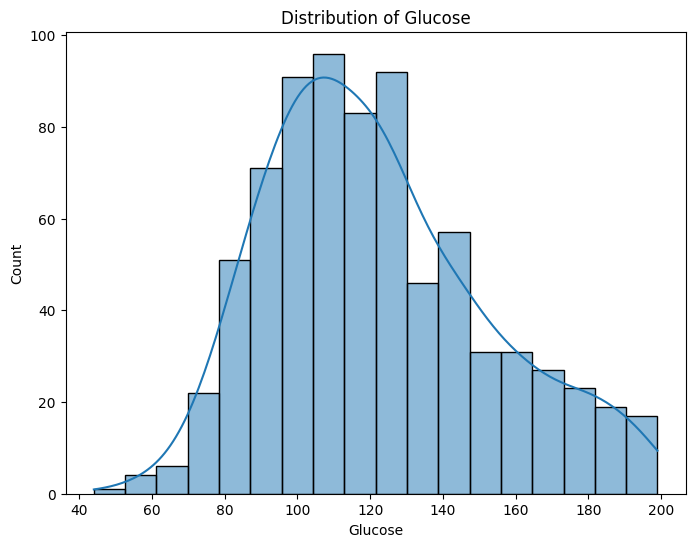

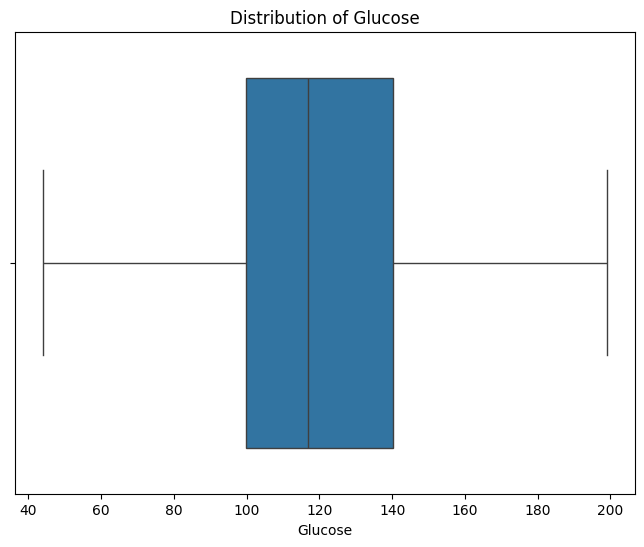

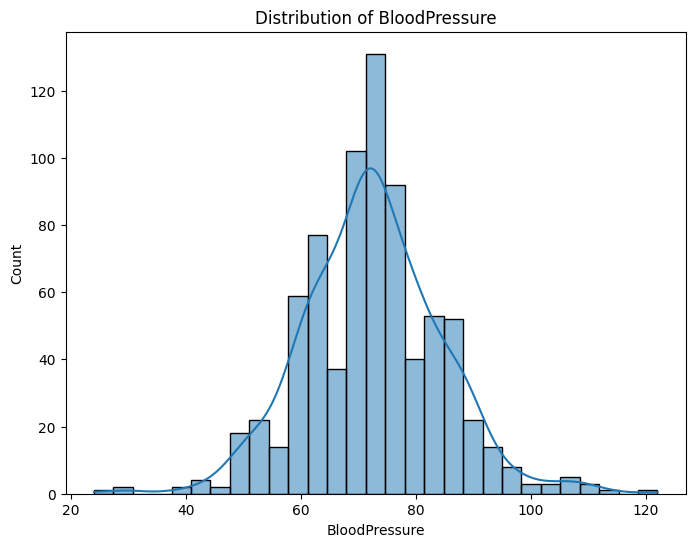

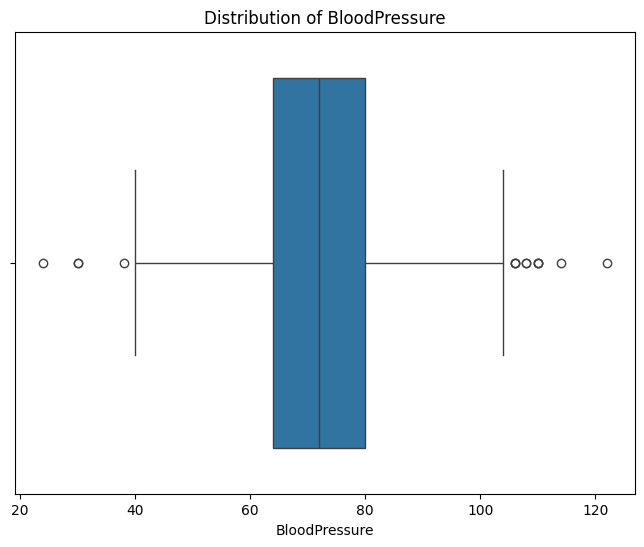

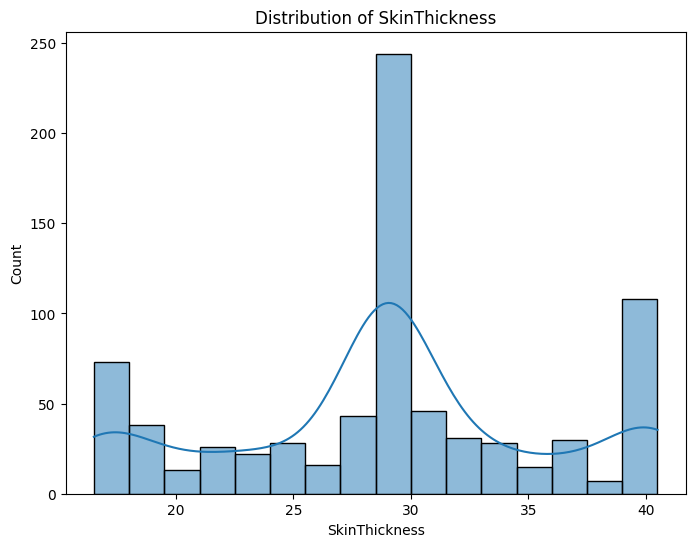

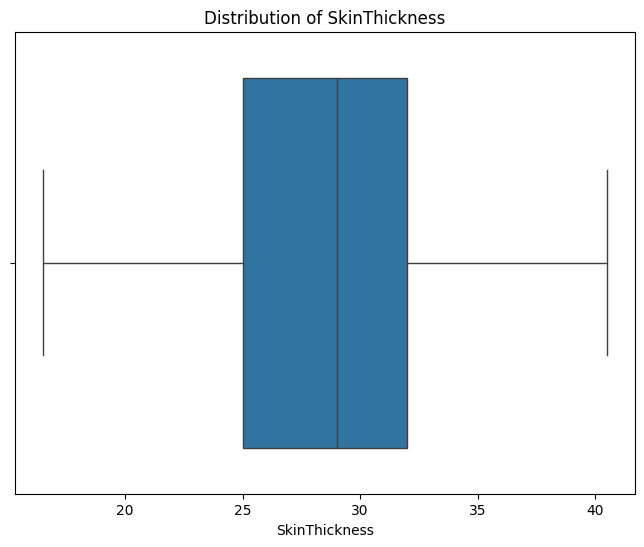

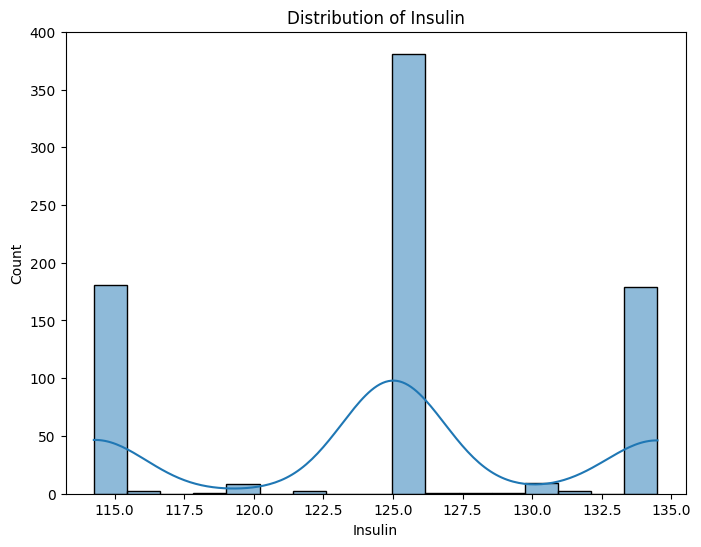

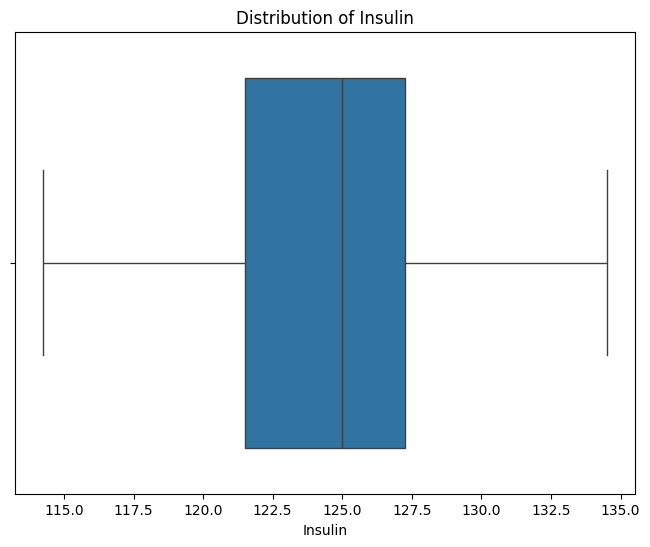

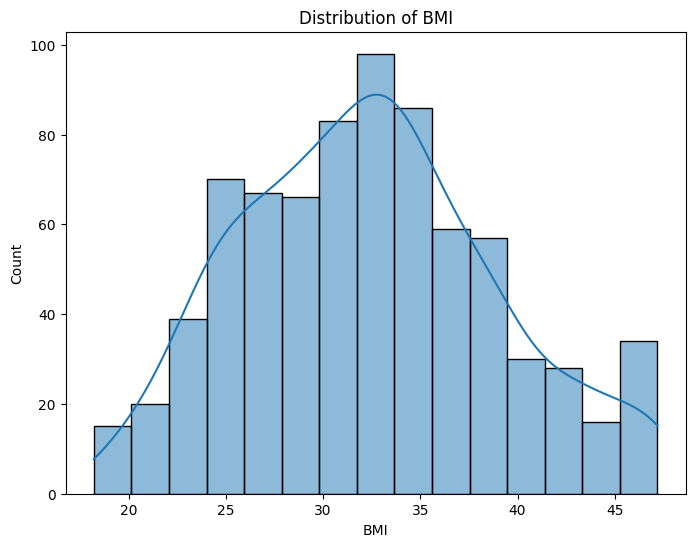

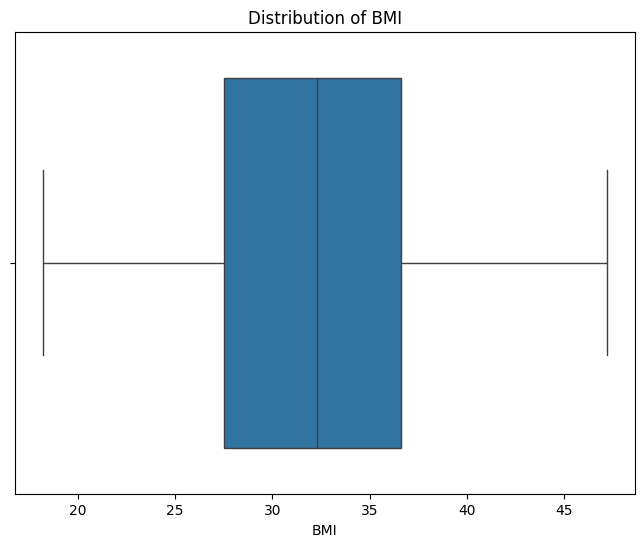

In [48]:
#ploting data to check the skewness and outliers
for col in skew_out:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.show()
    

In [20]:
#managing outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 + IQR)
    upper_range = Q3+(1.5 + IQR)
    return lower_range,upper_range

In [21]:
lskinthickness,uskinthickness = remove_outlier(df['SkinThickness'])
df['SkinThickness'] = np.where(df['SkinThickness'] > uskinthickness,uskinthickness,df['SkinThickness'])
df['SkinThickness'] = np.where(df['SkinThickness'] < lskinthickness,lskinthickness,df['SkinThickness'])

linsulin, uinsulin = remove_outlier(df['Insulin'])
df['Insulin'] = np.where(df['Insulin'] > uinsulin,uinsulin,df['Insulin'])
df['Insulin'] = np.where(df['Insulin'] < linsulin,linsulin,df['Insulin'])

lbmi, ubmi = remove_outlier(df['BMI'])
df['BMI'] = np.where(df['BMI'] > ubmi,ubmi,df['BMI'])
df['BMI'] = np.where(df['BMI'] < lbmi,lbmi,df['BMI'])

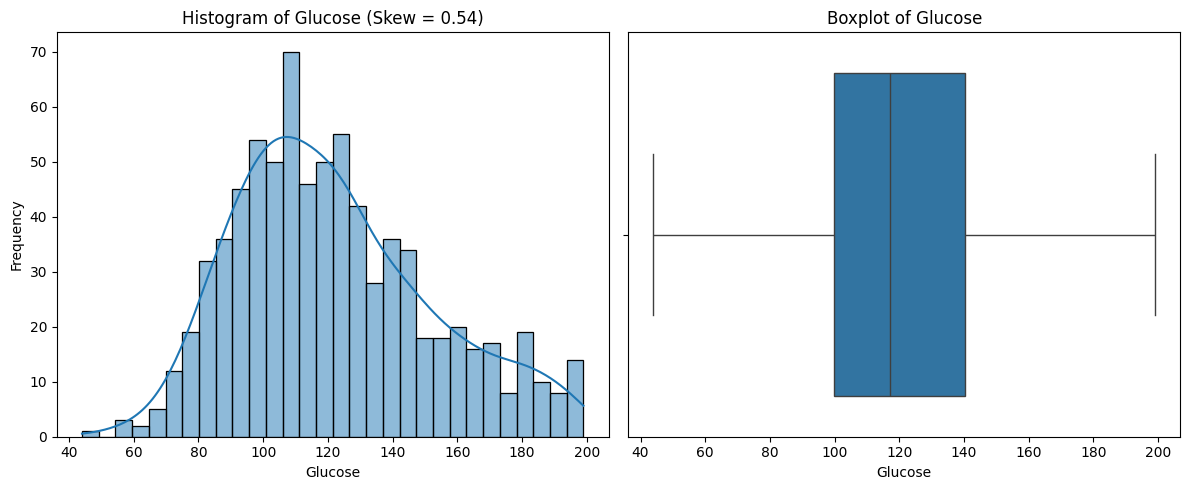

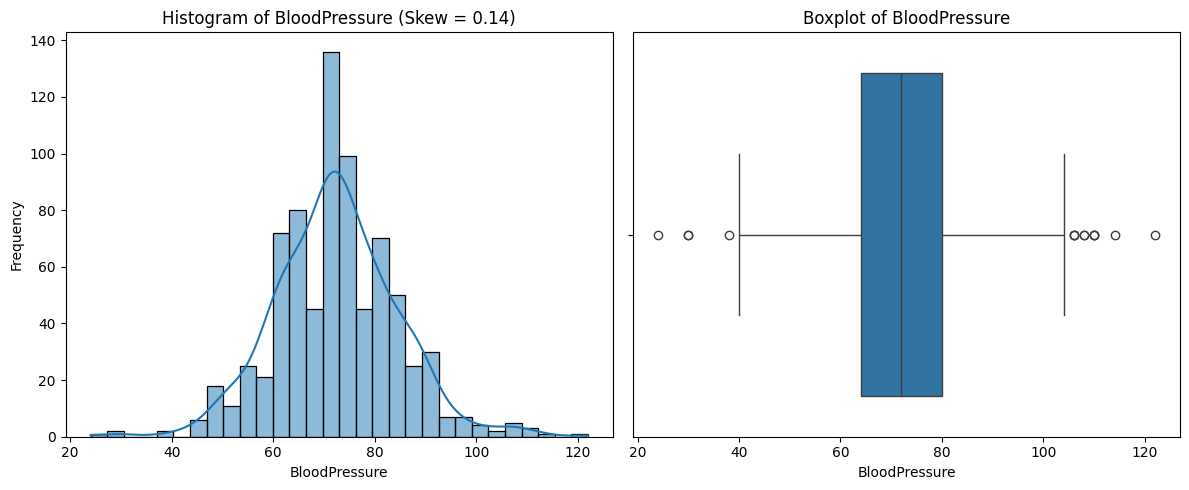

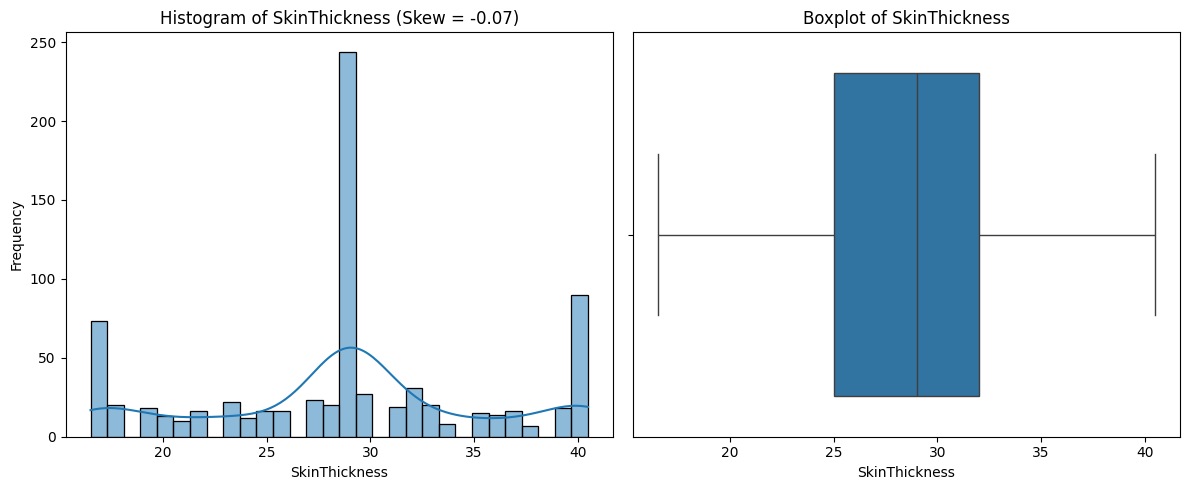

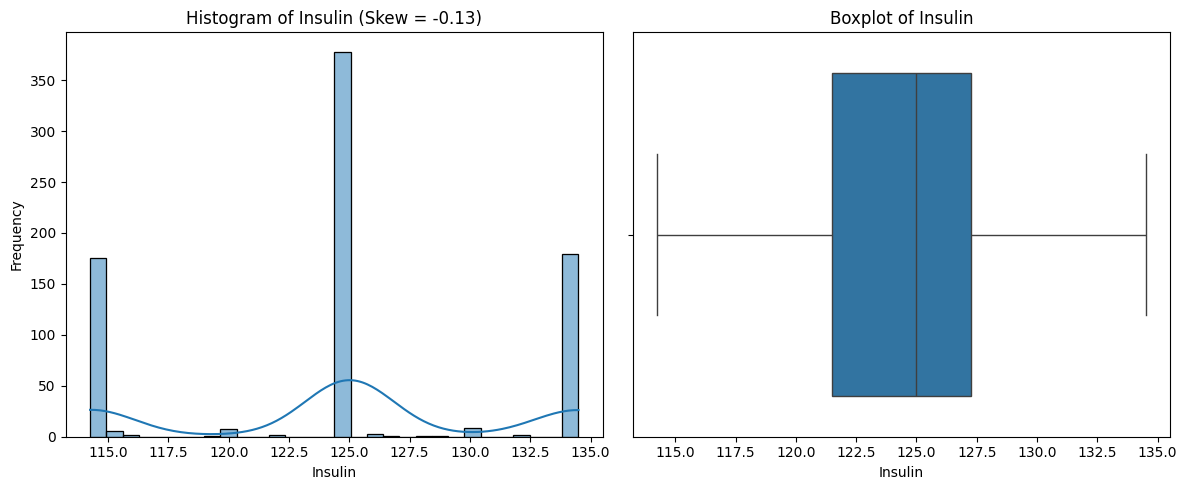

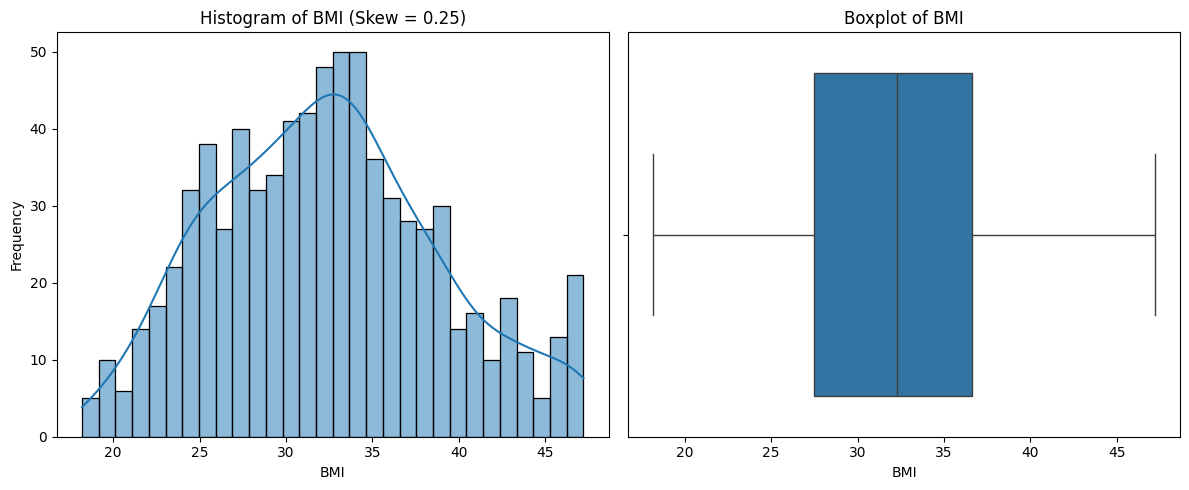

In [22]:
#checking the outliers and skewedness of data 
for col in skew_out:   # skew_out = list of columns you want to check
    plt.figure(figsize=(12,5))
    
    # Histogram with KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col} (Skew = {df[col].skew():.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
#spliting the data
x = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train ,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [25]:
x_train.shape,x_test.shape

((614, 8), (154, 8))

In [26]:
x_train.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [27]:
x_train.isnull().sum() #checking missing value in x_train

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [28]:
x_test.isnull().sum() #checking missing value in x_test

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [29]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])
#capping outliers
for df3 in [x_train, x_test]:
    df3['Glucose'] = max_value(df3, 'Glucose', 3.2)
    df3['BloodPressure'] = max_value(df3, 'BloodPressure', 21.8)
    df3['Insulin'] = max_value(df3, 'Insulin', 55)
    df3['BMI'] = max_value(df3, 'BMI', 57)

In [30]:
x_train.Glucose.max(), x_test.Glucose.max()

(np.float64(3.2), np.float64(3.2))

In [31]:
x_train.BloodPressure.max(), x_test.BloodPressure.max()

(np.float64(21.8), np.float64(21.8))

In [33]:
x_train.Insulin.max(), x_test.Insulin.max()

(np.float64(55.0), np.float64(55.0))

In [32]:
x_train.BMI.max(), x_test.BMI.max()

(np.float64(47.2), np.float64(47.2))

In [34]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,6.140000e+02,6.140000e+02,614.000000,614.0,614.000000,614.000000,614.000000
mean,3.874593,3.200000e+00,2.180000e+01,28.906352,55.0,32.497068,0.466471,33.594463
std,3.443637,4.444513e-16,7.111221e-15,6.881704,0.0,6.614433,0.333203,12.016168
min,0.000000,3.200000e+00,2.180000e+01,16.500000,55.0,18.200000,0.078000,21.000000
25%,1.000000,3.200000e+00,2.180000e+01,25.000000,55.0,27.600000,0.238000,24.000000
50%,3.000000,3.200000e+00,2.180000e+01,29.000000,55.0,32.400000,0.369000,29.000000
75%,6.000000,3.200000e+00,2.180000e+01,32.750000,55.0,36.775000,0.606500,41.000000
max,17.000000,3.200000e+00,2.180000e+01,40.500000,55.0,47.200000,2.420000,81.000000


In [35]:
x_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,1.540000e+02,1.540000e+02,154.000000,154.0,154.000000,154.000000,154.000000
mean,3.727273,3.200000e+00,2.180000e+01,28.590909,55.0,31.731169,0.493429,31.831169
std,3.064178,4.455381e-16,3.564305e-15,7.101379,0.0,6.244564,0.323914,10.598314
min,0.000000,3.200000e+00,2.180000e+01,16.500000,55.0,18.200000,0.100000,21.000000
25%,1.000000,3.200000e+00,2.180000e+01,23.250000,55.0,26.725000,0.258250,24.000000
50%,3.000000,3.200000e+00,2.180000e+01,29.000000,55.0,31.600000,0.383000,28.000000
75%,5.000000,3.200000e+00,2.180000e+01,32.000000,55.0,35.650000,0.670250,38.000000
max,13.000000,3.200000e+00,2.180000e+01,40.500000,55.0,47.200000,1.699000,65.000000


In [36]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,3.2,21.8,29.0,55.0,35.2,0.692,54
118,4,3.2,21.8,23.0,55.0,28.2,0.443,22
247,0,3.2,21.8,33.0,55.0,47.2,0.427,23
157,1,3.2,21.8,21.0,55.0,25.2,0.833,23
468,8,3.2,21.8,29.0,55.0,30.0,0.183,38


In [37]:
x_train = pd.DataFrame(x_train, columns= x.columns)
x_test = pd.DataFrame(x_test, columns= x.columns)

In [38]:
cols = x_train.columns

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [40]:
x_train = pd.DataFrame(x_train, columns=[cols])

In [41]:
x_test = pd.DataFrame(x_test,columns=[cols])

In [42]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.0,614.0,614.000000,614.0,614.000000,614.000000,614.000000
mean,0.227917,0.0,0.0,0.516931,0.0,0.493002,0.165871,0.209908
std,0.202567,0.0,0.0,0.286738,0.0,0.228084,0.142273,0.200269
min,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.058824,0.0,0.0,0.354167,0.0,0.324138,0.068318,0.050000
50%,0.176471,0.0,0.0,0.520833,0.0,0.489655,0.124253,0.133333
75%,0.352941,0.0,0.0,0.677083,0.0,0.640517,0.225662,0.333333
max,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000


In [43]:
#model training
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [44]:
y_pred_test = logreg.predict(x_test)
y_pred_test

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [45]:
#predict_proba
logreg.predict_proba(x_test)[:,0]

array([0.42095224, 0.72594818, 0.6854177 , 0.6488618 , 0.81460071,
       0.8463344 , 0.48509283, 0.43174325, 0.68037067, 0.38928557,
       0.66051641, 0.22954456, 0.5972231 , 0.65489305, 0.5361895 ,
       0.76703373, 0.52854343, 0.89234798, 0.55119583, 0.62814658,
       0.49191677, 0.52351678, 0.75569956, 0.57754832, 0.87379173,
       0.69732745, 0.89582795, 0.23741665, 0.85203354, 0.78660838,
       0.60273666, 0.61529988, 0.77335654, 0.58493649, 0.89234034,
       0.62595826, 0.60369167, 0.86122368, 0.70011261, 0.70982774,
       0.7005706 , 0.53190949, 0.73867079, 0.69847172, 0.62281514,
       0.7665126 , 0.86740726, 0.81550424, 0.5856993 , 0.68629972,
       0.68712404, 0.76104484, 0.27951303, 0.58302796, 0.62646395,
       0.8800496 , 0.80688628, 0.41096709, 0.78440599, 0.62282994,
       0.45692603, 0.64226476, 0.88141451, 0.62613102, 0.73986592,
       0.59300646, 0.54266015, 0.8050699 , 0.56300916, 0.59950871,
       0.80321728, 0.75154973, 0.71910485, 0.25610755, 0.47528

In [46]:
logreg.predict_proba(x_test)[:,1]

array([0.57904776, 0.27405182, 0.3145823 , 0.3511382 , 0.18539929,
       0.1536656 , 0.51490717, 0.56825675, 0.31962933, 0.61071443,
       0.33948359, 0.77045544, 0.4027769 , 0.34510695, 0.4638105 ,
       0.23296627, 0.47145657, 0.10765202, 0.44880417, 0.37185342,
       0.50808323, 0.47648322, 0.24430044, 0.42245168, 0.12620827,
       0.30267255, 0.10417205, 0.76258335, 0.14796646, 0.21339162,
       0.39726334, 0.38470012, 0.22664346, 0.41506351, 0.10765966,
       0.37404174, 0.39630833, 0.13877632, 0.29988739, 0.29017226,
       0.2994294 , 0.46809051, 0.26132921, 0.30152828, 0.37718486,
       0.2334874 , 0.13259274, 0.18449576, 0.4143007 , 0.31370028,
       0.31287596, 0.23895516, 0.72048697, 0.41697204, 0.37353605,
       0.1199504 , 0.19311372, 0.58903291, 0.21559401, 0.37717006,
       0.54307397, 0.35773524, 0.11858549, 0.37386898, 0.26013408,
       0.40699354, 0.45733985, 0.1949301 , 0.43699084, 0.40049129,
       0.19678272, 0.24845027, 0.28089515, 0.74389245, 0.52471

In [47]:
#lets check accuracy 
from sklearn.metrics import accuracy_score
print('Model accuracy score:{0:0.4f}'.format(accuracy_score(y_test,y_pred_test)))


Model accuracy score:0.7532


In [48]:
y_pred_train = logreg.predict(x_train)
y_pred_train

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [49]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.6906


In [50]:

# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.6906
Test set score: 0.7532


In [51]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [52]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(x_test, y_test)))

Training set score: 0.6938
Test set score: 0.7338


In [53]:
# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [54]:

# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(x_test, y_test)))

Training set score: 0.6401
Test set score: 0.6948


In [55]:
# check class distribution in test set

y_test.value_counts()

Outcome
0    107
1     47
Name: count, dtype: int64

In [56]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


In [57]:

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[100   7]
 [ 31  16]]

True Positives(TP) =  100

True Negatives(TN) =  16

False Positives(FP) =  7

False Negatives(FN) =  31


<Axes: >

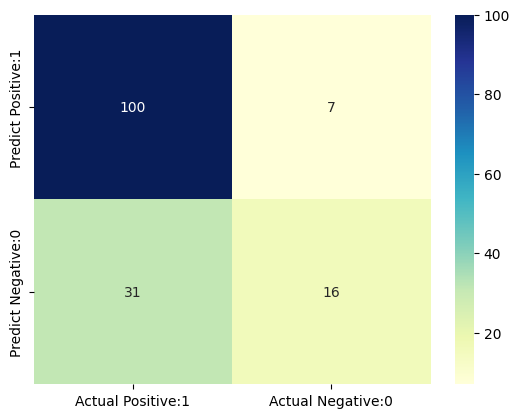

In [58]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       107
           1       0.70      0.34      0.46        47

    accuracy                           0.75       154
   macro avg       0.73      0.64      0.65       154
weighted avg       0.74      0.75      0.72       154



In [60]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [61]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7532


In [62]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2468


In [63]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9346


In [64]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7634


In [65]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7634


In [66]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3043


In [67]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6957


In [68]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(x_test)[0:10]

y_pred_prob

array([[0.42095224, 0.57904776],
       [0.72594818, 0.27405182],
       [0.6854177 , 0.3145823 ],
       [0.6488618 , 0.3511382 ],
       [0.81460071, 0.18539929],
       [0.8463344 , 0.1536656 ],
       [0.48509283, 0.51490717],
       [0.43174325, 0.56825675],
       [0.68037067, 0.31962933],
       [0.38928557, 0.61071443]])

In [69]:

# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Diabetes (0)', 'Prob of - Diabetes(1)'])

y_pred_prob_df

,Prob of - No Diabetes (0),Prob of - Diabetes(1)
0,0.420952,0.579048
1,0.725948,0.274052
2,0.685418,0.314582
3,0.648862,0.351138
4,0.814601,0.185399
5,0.846334,0.153666
6,0.485093,0.514907
7,0.431743,0.568257
8,0.680371,0.319629
9,0.389286,0.610714


In [70]:

# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(x_test)[0:10, 1]

array([0.57904776, 0.27405182, 0.3145823 , 0.3511382 , 0.18539929,
       0.1536656 , 0.51490717, 0.56825675, 0.31962933, 0.61071443])

In [71]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(x_test)[:, 1]

Text(0, 0.5, 'Frequency')

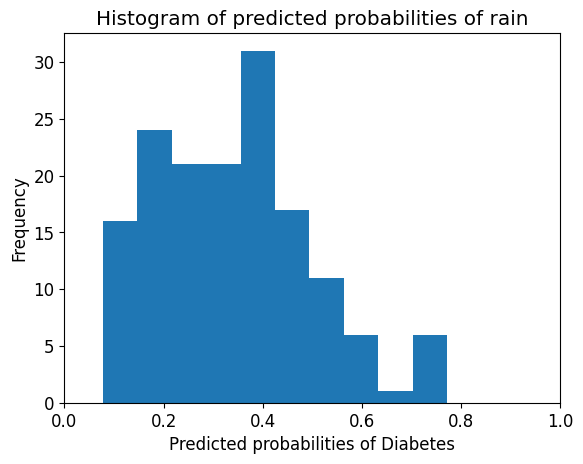

In [72]:

# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Diabetes')
plt.ylabel('Frequency')

In [74]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    threshold = i/10
    y_pred_prob = logreg.predict_proba(x_test)[:,1].reshape(-1,1)
    
    y_pred_bin = binarize(y_pred_prob, threshold=threshold).flatten()  # 0/1
    y_pred_labels = np.where(y_pred_bin==1,'Yes','No')                 # optional for display
    
    cm = confusion_matrix(y_test, y_pred_bin)  # numeric 0/1 for metrics
    
    print(f"With threshold {threshold}:\n")
    print("Confusion Matrix:\n", cm)
    print("Correct predictions:", cm[0,0]+cm[1,1])
    print("Type I errors (False Positives):", cm[0,1])
    print("Type II errors (False Negatives):", cm[1,0])
    print("Accuracy score:", accuracy_score(y_test, y_pred_bin))
    print("Sensitivity:", cm[1,1]/(cm[1,1]+cm[1,0]))
    print("Specificity:", cm[0,0]/(cm[0,0]+cm[0,1]))
    print("====================================================\n")

With threshold 0.1:

Confusion Matrix:
 [[  3 104]
 [  0  47]]
Correct predictions: 50
Type I errors (False Positives): 104
Type II errors (False Negatives): 0
Accuracy score: 0.3246753246753247
Sensitivity: 1.0
Specificity: 0.028037383177570093

With threshold 0.2:

Confusion Matrix:
 [[35 72]
 [ 2 45]]
Correct predictions: 80
Type I errors (False Positives): 72
Type II errors (False Negatives): 2
Accuracy score: 0.5194805194805194
Sensitivity: 0.9574468085106383
Specificity: 0.32710280373831774

With threshold 0.3:

Confusion Matrix:
 [[60 47]
 [ 6 41]]
Correct predictions: 101
Type I errors (False Positives): 47
Type II errors (False Negatives): 6
Accuracy score: 0.6558441558441559
Sensitivity: 0.8723404255319149
Specificity: 0.5607476635514018

With threshold 0.4:

Confusion Matrix:
 [[79 28]
 [20 27]]
Correct predictions: 106
Type I errors (False Positives): 28
Type II errors (False Negatives): 20
Accuracy score: 0.6883116883116883
Sensitivity: 0.574468085106383
Specificity: 0.738

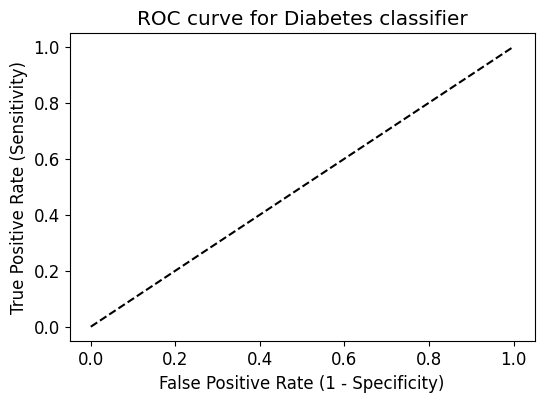

In [75]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Diabetes classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [76]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7723


In [77]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, x_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7407


In [78]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(x_train, y_train)

In [79]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 5


In [80]:
# transform the training data

X_train_rfecv = rfecv.transform(x_train)


# train classifier

logreg.fit(X_train_rfecv, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [81]:
# test classifier on test data

X_test_rfecv = rfecv.transform(x_test)

y_pred_rfecv = logreg.predict(X_test_rfecv)

In [82]:
print ("Classifier score: {:.4f}".format(logreg.score(X_test_rfecv,y_test)))


Classifier score: 0.7532


In [83]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_rfecv)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

Confusion matrix

 [[100   7]
 [ 31  16]]

True Positives(TP1) =  100

True Negatives(TN1) =  16

False Positives(FP1) =  7

False Negatives(FN1) =  31


In [84]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.66666667 0.7398374  0.65853659 0.67479675 0.72131148]


In [85]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.6922


In [86]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)

,estimator,LogisticRegre...r='liblinear')
,param_grid,"[{'penalty': ['l1', 'l2']}, {'C': [1, 10, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [87]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.6922


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=0, solver='liblinear')


In [88]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV score on test set: 0.7532


In [90]:

import joblib
joblib.dump(logreg,'Diabetes_model.pkl')
joblib.dump(scaler,'Diabetes_scaler.pkl')
print("MODEL AND SCALER SAVED SUCCESSFULLY")

MODEL AND SCALER SAVED SUCCESSFULLY


In [91]:
import joblib  

# Load model and scaler
logreg = joblib.load('diabetes_model.pkl')
scaler = joblib.load('diabetes_scaler.pkl')

print("Model and scaler loaded successfully!")

Model and scaler loaded successfully!
